In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

In [7]:
data

,x1,x2,y
0,1.689767,-1.408241,1.0
1,1.530287,-1.459848,1.0
2,-1.175042,-1.447633,0.0
3,-2.585395,0.963532,0.0
4,1.372246,0.440695,1.0
...,...,...,...
195,-0.435396,0.715716,0.0
196,1.040417,1.108613,1.0
197,1.883798,0.782433,0.0
198,1.829367,1.542978,1.0


__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [8]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

print(model.score(X_test,y_test).round(3))
print(model.score(X_train,y_train))

### Your code is here




0.8
1.0


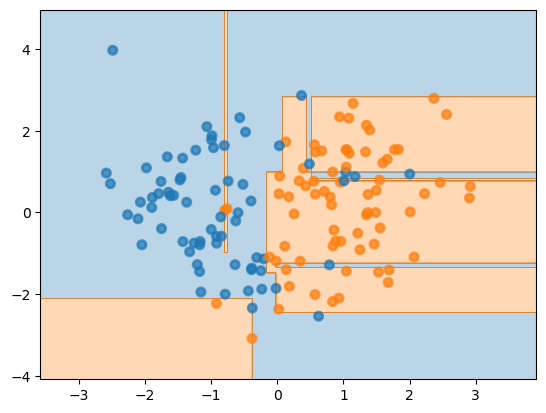

In [63]:
plot_surface(model,X_train,y_train)

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [32]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 50})

In [16]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

In [42]:
["train_score","test_score","depth","leaf"]

['train_score', 'test_score', 'depth', 'leaf']

In [41]:
[model.score(X_train,y_train),model.score(X_test,y_test),depth,leaf]

[0.94375, 0.8, 6, 3]

In [44]:
DF = df_itet = pd.DataFrame( columns = ["train_score","test_score","depth","leaf"])
count = 0
#f = plt.figure()
for depth in max_depth_set:
    #f = plt.figure()
    for leaf in min_samples_leaf_set:
        plt.figure()
        count = count + 1
        model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf )
        model.fit(X_train,y_train)
        #ax = plt.subplot(20,1,count)
        #ax = f.add_subplot(5,4,count)
        #plot_surface_axes(model,X_test,y_test,ax,model.score(X_train,y_train),model.score(X_test,y_test))
        df_iter = pd.DataFrame(data = [[model.score(X_train,y_train),model.score(X_test,y_test),depth,leaf]], columns = ["train_score","test_score","depth","leaf"])
        DF = pd.concat([DF,df_iter], axis = 0)

C:\Users\piskynovsa\AppData\Local\Temp\ipykernel_16404\247476372.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  DF = pd.concat([DF,df_iter], axis = 0)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
DF[DF["train_score"] == DF["train_score"].max()]

,train_score,test_score,depth,leaf
0,0.94375,0.8,6,3
0,0.94375,0.8,7,3
0,0.94375,0.8,8,3
0,0.94375,0.8,9,3
0,0.94375,0.8,12,3


__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [88]:
X_train

,x1,x2
0,-1.618694,0.407757
1,1.249152,-0.912770
2,-2.488649,3.971278
3,-2.069878,0.252602
4,2.368101,2.793738
...,...,...
135,-1.209659,-1.277852
136,1.770796,1.535577
137,1.346412,-0.060801
138,-0.378923,-2.341745


In [87]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [89]:
from sklearn.pipeline import Pipeline

#model = Pipeline(steps = [("tranformer", CustomFunctionTransformer("x1",
    #                                                               "x2",
       #                                                            lambda x1, x2: 2*x1 - x2)),
      #                   ("tree", DecisionTreeClassifier(max_depth=3))])

pipe = Pipeline([("custom_transformer", CustomFunctionTransformer("x1",
                                                                  "x2",
                                                                  lambda x,y: 2*x-y)),
                 ("decision_tree", DecisionTreeClassifier(max_depth=3))])

pipe.fit(X_train,y_train)



Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x00000262F71989A0>,
                                           second_col='x2')),
                ('decision_tree', DecisionTreeClassifier(max_depth=3))])

In [93]:
print(f"test_accuracy{pipe.score(X_test,y_test).round(2)}")
print(f"train_accuracy{pipe.score(X_train,y_train).round(2)}")

Трансформировали датасет!
test_accuracy0.75
Трансформировали датасет!
train_accuracy0.87


In [82]:
accuracy_score(y_test, model.predict(X_test))

Трансформировали датасет!


0.75

In [68]:
X = X_train.copy()
y = y_train.copy()
clf = model

In [71]:
X.iloc[:, 0].min() - 1

-3.5853950710158844

In [77]:
np.c_

In [72]:



plot_step = 0.01
palette = sns.color_palette(n_colors=len(np.unique(y)))
cmap = ListedColormap(palette)
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 640x480 with 0 Axes>